In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import glob

In [9]:
def getLogs(filename):
    values = []
    file = open(filename,'r')
    for line in file:
        try:
            values.append(float(line))
        except:
            print line
    file.close()
    return values

In [12]:
dic = {}
for filename in glob.glob(os.path.join('logs/*/*_cut.txt')):
    dic[filename.split('/')[1]] = getLogs(filename)

210.9environment

-17.98487196environment

-



In [14]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [63]:
def plotgraph(dic, env1, env2, moving_avg=False, moving_value=0):
    data_env1 = dic[env1]
    data_env2 = dic[env2]
    if moving_avg:
        data_env1 = moving_average(data_env1, moving_value)
        data_env1 = moving_average(data_env1, moving_value)
    line_up, = plt.plot(data_env1, label=env1)
    line_down, = plt.plot(data_env2, 'r', label=env2)
    plt.legend(handles=[line_up, line_down])
    plt.show()

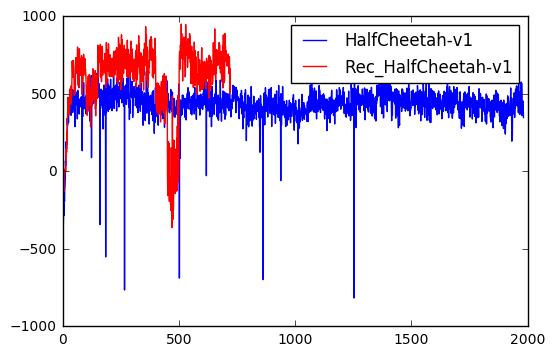

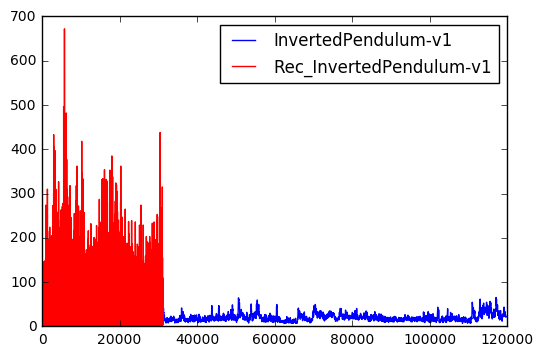

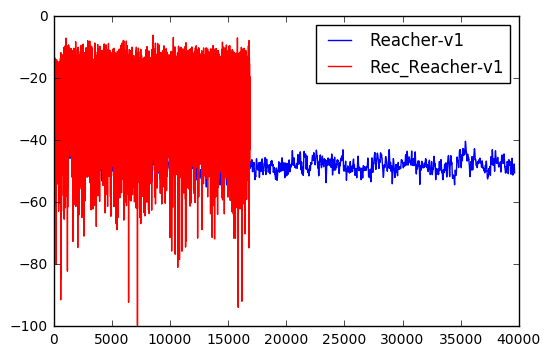

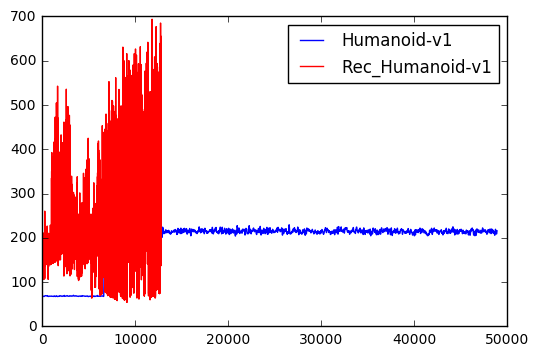

In [90]:
plotgraph(dic, 'HalfCheetah-v1', 'Rec_HalfCheetah-v1')
plotgraph(dic, 'InvertedPendulum-v1', 'Rec_InvertedPendulum-v1', True, 50)
plotgraph(dic, 'Reacher-v1', 'Rec_Reacher-v1',  True, 50)
plotgraph(dic, 'Humanoid-v1', 'Rec_Humanoid-v1',  True, 50)

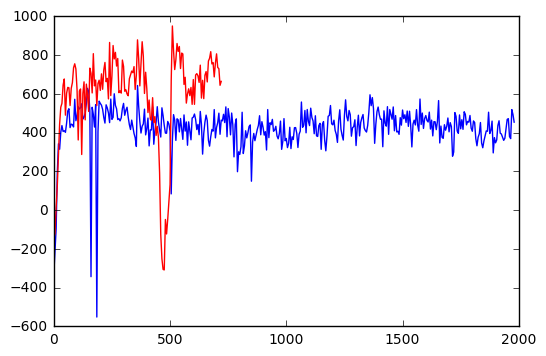

In [79]:
half = dic['HalfCheetah-v1'][0::5]
X =range(0, len(dic['HalfCheetah-v1']))[0::5]
rec_half = dic['Rec_HalfCheetah-v1'][0::5]
rec_X =range(0, len(dic['Rec_HalfCheetah-v1']))[0::5]
plt.plot(X, half)
plt.plot(rec_X, rec_half, 'r')
plt.show()

600 156


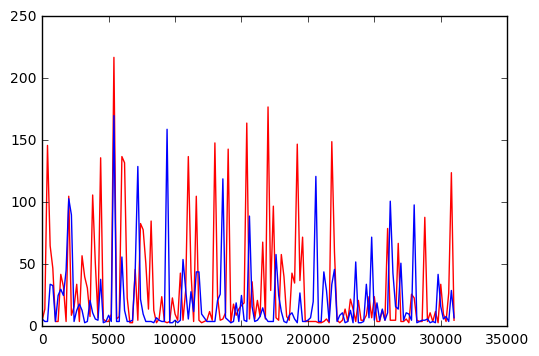

In [95]:
points= 200
half = dic['InvertedPendulum-v1'][0::points]
X =range(0, len(dic['InvertedPendulum-v1']))[0::points]
rec_half = dic['Rec_InvertedPendulum-v1'][0::points]
rec_X =range(0, len(dic['Rec_InvertedPendulum-v1']))[0::points]
print len(X), len(rec_X)
plt.plot(rec_X, rec_half, 'r')
plt.plot(X[0:len(rec_X)], half[0:len(rec_X)])
plt.show()

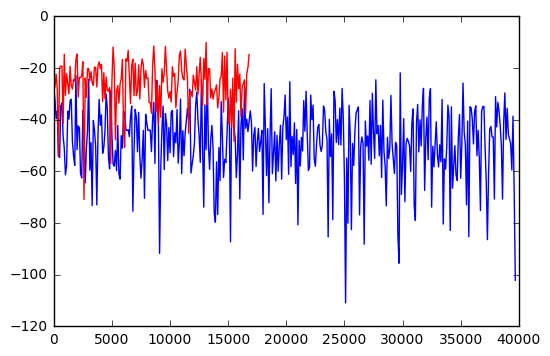

In [97]:
points = 100
half = dic['Reacher-v1'][0::points]
X =range(0, len(dic['Reacher-v1']))[0::points]
rec_half = dic['Rec_Reacher-v1'][0::points]
rec_X =range(0, len(dic['Rec_Reacher-v1']))[0::points]
plt.plot(X, half)
plt.plot(rec_X, rec_half, 'r')
plt.show()

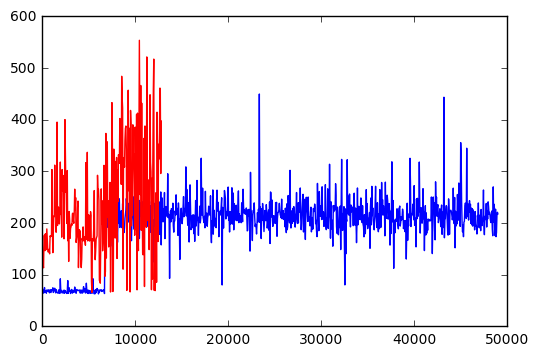

In [100]:
points = 50
half = dic['Humanoid-v1'][0::points]
X =range(0, len(dic['Humanoid-v1']))[0::points]
rec_half = dic['Rec_Humanoid-v1'][0::points]
rec_X =range(0, len(dic['Rec_Humanoid-v1']))[0::points]
plt.plot(X, half)
plt.plot(rec_X[0:len(rec_X)], rec_half[0:len(rec_X)], 'r')
plt.show()